## Set-up

In [1]:
import pandas as pd
import os
import sklearn
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append(os.path.dirname(os.getcwd()))


import data_utils
import network_calculations

Rtab_path="../../data/pangenomes/Campylobacter_coli/roary_pangenome/gene_presence_absence.Rtab"
pheno_path="../../data/phenotypes/Campylobacter_coli_ciprofloxacin.csv"

presence= data_utils.get_gene_presence_matrix(Rtab_path)
pheno = data_utils.get_pheno_df(pheno_path)

labeled_data = data_utils.get_labeled_matrix(presence, pheno)


In [2]:
labeled_accessory.shape

NameError: name 'labeled_accessory' is not defined

<Axes: >

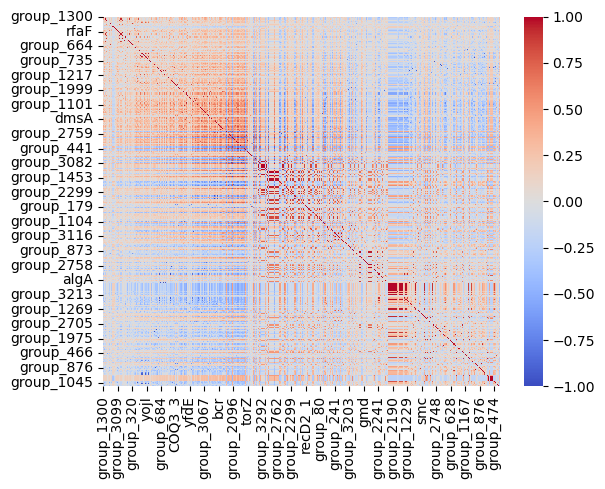

In [ ]:
core = data_utils.get_core(presence, 0.9)
unique = data_utils.get_unique(presence, 0.15)

core_uniqe=core+unique

accessory = data_utils.get_presence_without_gene_set(presence, core_uniqe)
labeled_accessory = data_utils.get_labeled_matrix(accessory, pheno)
corr_accessory_gene = labeled_accessory.corr()

sns.heatmap(corr_accessory_gene, cmap="coolwarm", center=0)

FileNotFoundError: [Errno 2] No such file or directory: 'data/graphs/accessory_gene_correlation_C.coli_ciprofloxacin.gml'

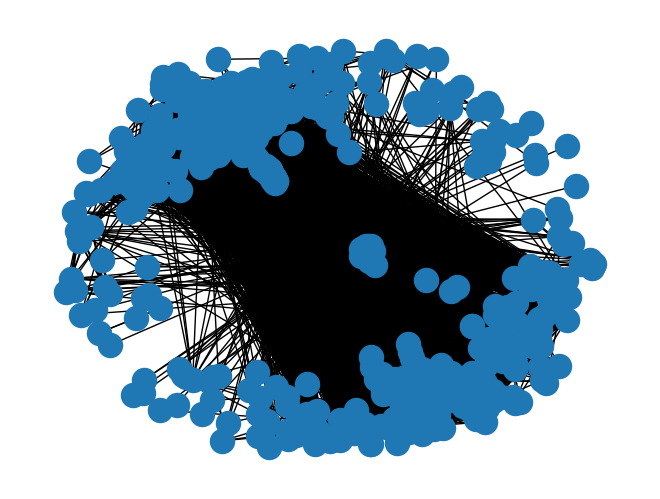

In [ ]:
G = nx.Graph()
genes_num=corr_accessory_gene.shape[0]
for i in range(genes_num):
    for j in range(i+1, genes_num):
        if corr_accessory_gene.iloc[i,j] > 0.5 or corr_accessory_gene.iloc[i,j] < -0.5:
            G.add_edge(corr_accessory_gene.index[i], corr_accessory_gene.columns[j], weight=corr_accessory_gene.iloc[i,j])

nx.draw(G)
nx.write_gml(G, "data/graphs/accessory_gene_correlation_C.coli_ciprofloxacin.gml")

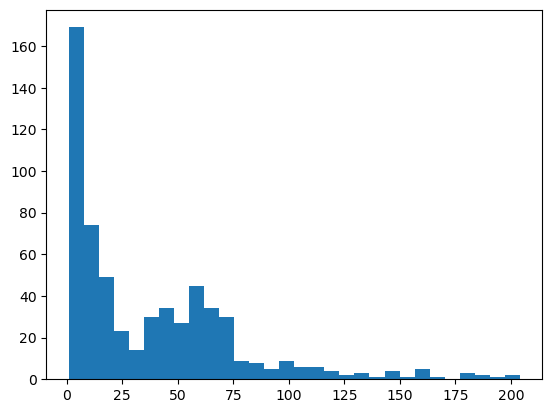

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=30)
plt.show()